<a href="https://colab.research.google.com/github/LabdhiSheth/Deep-Learning-lab-work/blob/main/fashion_Mnist_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 18BCE101 Labdhi Sheth
Deep Learning practical 1

Aim:
Fashion mnist classification dataset using CNN.

Fashion-MNIST is a dataset consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes (T-shirt/top, Trouser,	Pullover,	Dress,	Coat, Sandal,	Shirt,	Sneaker,	Bag,	Ankle boot)

Importing libraries

In [ ]:
from tensorflow import keras
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout,Flatten
from keras.models import Sequential
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn import metrics
from keras import optimizers
import numpy
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train = pd.read_csv('/content/gdrive/My Drive/6th semester/Deep learning/Practicals/3/fashion-mnist_train.csv')
test = pd.read_csv('/content/gdrive/My Drive/6th semester/Deep learning/Practicals/3/fashion-mnist_test.csv')

train = train.values
test = test.values

splitting in train and test set

In [ ]:
X_train = train[:,1:785]
y_train = train[:,0]
X_test = test[:,1:785]
y_test = test[:,0]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


Displaying the data

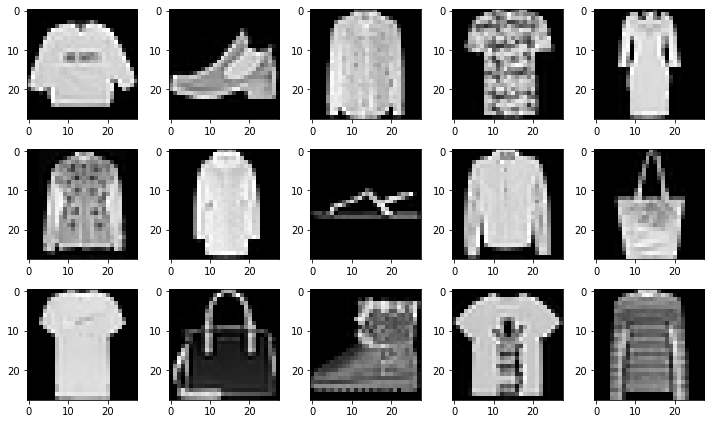

In [ ]:
Train_set = X_train.reshape(X_train.shape[0], 28, 28).astype('float32')
Test_set = X_test.reshape(X_test.shape[0], 28, 28).astype('float32')

row = 3
col = 5

num = row*col
images = Train_set[:num]
labels = Test_set[:num]

fig, axes = plt.subplots(row, col, figsize=(2*col,2*row))
for i in range(row*col):
    ax = axes[i//col, i%col]
    ax.imshow(images[i], cmap='gray')
plt.tight_layout()
plt.show()

Reshaping the data

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

print("X train",X_train.shape)
print("X test",X_test.shape)

X train (60000, 28, 28, 1)
X test (10000, 28, 28, 1)


Normalizing the train and test sets

In [ ]:
X_train = X_train/255
X_test = X_test/255

One hot encoding

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test_copy = y_test                        #for future use
y_test = np_utils.to_categorical(y_test)

print("y train",y_train.shape)
print("y test",y_test.shape)

y train (60000, 10)
y test (10000, 10)


Building the Model

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides=1,padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = 1, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = 2))
model.add(Flatten())
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = y_test.shape[1], activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 20, batch_size = 100, verbose = 1)

Epoch 1/20
600/600 [==============================] - 35s 4ms/step - loss: 0.6924 - accuracy: 0.7526 - val_loss: 0.3222 - val_accuracy: 0.8856
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3276 - accuracy: 0.8817 - val_loss: 0.2777 - val_accuracy: 0.9012
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2831 - accuracy: 0.8978 - val_loss: 0.2757 - val_accuracy: 0.8966
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2562 - accuracy: 0.9058 - val_loss: 0.2476 - val_accuracy: 0.9114
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2290 - accuracy: 0.9141 - val_loss: 0.2231 - val_accuracy: 0.9179
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2047 - accuracy: 0.9237 - val_loss: 0.2122 - val_accuracy: 0.9230
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1902 - accuracy: 0.9296 - val_loss: 0.2172 - val_accuracy: 0.9186
Epoch

In [ ]:
prediction = model.predict(X_test)
prediction = numpy.argmax(prediction, axis = 1)

In [ ]:
print("accuracy score for the Fashion MNIST classification of the dataset is :",metrics.accuracy_score(y_test_copy, prediction, normalize = True))
print(metrics.classification_report(y_test_copy, prediction))
print(metrics.confusion_matrix(y_test_copy, prediction))

accuracy score for the Fashion MNIST classification of the dataset is : 0.9279
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1000
           1       1.00      0.99      0.99      1000
           2       0.95      0.83      0.88      1000
           3       0.95      0.94      0.94      1000
           4       0.82      0.95      0.88      1000
           5       0.99      0.98      0.98      1000
           6       0.79      0.80      0.80      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

[[868   1  13   6   5   1 101   1   4   0]
 [  0 988   1   7   2   0   2   0   0   0]
 [ 13   0 829   8  94   1  54   0   1   0]
 [ 13   2   3 938  24   0  18   0